<h3>Imports</h3>
<ul>
    <li>Load Data (.py files)</li>
    <ul>
        <li>Data loading & pre-processing</li>
        <li>TFIDF vectorization</li>
        <li>Pre-built embeddings </li>
    </ul>
    <li>Common libraries</li>
    <ul>
        <li>Pandas</li>
        <li>Numpy</li>
        <li>Matplotlib</li>
        <li>Seaborn</li>
    </ul>
    <li>Scikit-Learn imports</li>
    <ul>
        <li>Metrics</li>
        <li>Naieve Bayes</li>
    </ul>
</ul>

In [59]:
# Import python files
from preprocess import PreProcess  # Python file to do all the pre-processing steps on data
from vectorizer import Vectorizer  # According to conversation in IR group, we do not need TFIDF vectors but, I applied it and used it in my naive bayes classification
from embedding import Embedding  # Ebedding class with all three types of embeddings

# Other imports
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sb

# Scikit-Learn imports
from sklearn.naive_bayes import MultinomialNB  # Naive Bayes classifier
from sklearn.decomposition import TruncatedSVD  # LSA 
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix
from sklearn.svm import SVC

<h3>Making data ready</h3>
<ul>
    <li>Load Data</li>
    <li>Pre-processing</li>
    <ul>
        <li>Case folding</li>
        <li>Special characters removal</li>
        <li>Stop words elimination</li>
        <li>Tokenizing</li>
        <li>Stemming</li>
        <li>Lemmatization</li>
    </ul>
    <li>Make TFIDF vectors ready</li>
</ul>

In [2]:
# Make an instance from Preprocess
preprocess = PreProcess()

# Start preprocess procedure
preprocess.preprocess()

# Load pre-processed data
# Train data
X_train = preprocess.X_train
y_train = preprocess.y_train

# Test data
X_test = preprocess.X_test
y_test = preprocess.y_test

<h4>Train data visuallization</h4>

In [3]:
pd.DataFrame(X_train)

,0,1,2,3,4,5,6,7,8,9,...,1439,1440,1441,1442,1443,1444,1445,1446,1447,1448
0,bromwel,high,cartoon,comedi,ran,time,program,school,life,teacher,...,None,None,None,None,None,None,None,None,None,None
1,homeless,houseless,georg,carlin,state,issu,year,never,plan,help,...,None,None,None,None,None,None,None,None,None,None
2,brilliant,overact,lesley,ann,warren,best,dramat,hobo,ladi,ever,...,None,None,None,None,None,None,None,None,None,None
3,easili,underr,film,inn,brook,cannon,sure,flaw,give,realist,...,None,None,None,None,None,None,None,None,None,None
4,typic,mel,brook,film,much,le,slapstick,movi,actual,plot,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,toward,end,movi,felt,technic,felt,like,classroom,watch,navi,...,None,None,None,None,None,None,None,None,None,None
24996,kind,movi,enemi,content,watch,time,bloodi,true,watch,make,...,None,None,None,None,None,None,None,None,None,None
24997,saw,descent,last,night,stockholm,film,festiv,one,huge,disappoint,...,None,None,None,None,None,None,None,None,None,None
24998,film,pick,pound,turn,rather,good,23rd,centuri,film,releas,...,None,None,None,None,None,None,None,None,None,None


<h4>Test data visualization</h4>

In [4]:
pd.DataFrame(X_test)

,0,1,2,3,4,5,6,7,8,9,...,1181,1182,1183,1184,1185,1186,1187,1188,1189,1190
0,went,saw,movi,last,night,coax,friend,mine,ill,admit,...,None,None,None,None,None,None,None,None,None,None
1,actor,turn,director,bill,paxton,follow,promis,debut,gothichorror,frailti,...,None,None,None,None,None,None,None,None,None,None
2,recreat,golfer,knowledg,sport,histori,plea,disney,sensit,issu,class,...,None,None,None,None,None,None,None,None,None,None
3,saw,film,sneak,preview,delight,cinematographi,unusu,creativ,act,good,...,None,None,None,None,None,None,None,None,None,None
4,bill,paxton,taken,true,stori,1913,u,golf,open,made,...,None,None,None,None,None,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
24995,occasion,let,kid,watch,garbag,understand,pathet,show,contest,pathet,...,None,None,None,None,None,None,None,None,None,None
24996,anymor,pretti,much,realiti,tv,show,peopl,make,fool,whatev,...,None,None,None,None,None,None,None,None,None,None
24997,basic,genr,thriller,intercut,uncomfort,menageatroi,fellow,tri,make,lot,...,None,None,None,None,None,None,None,None,None,None
24998,four,thing,intrigu,film,firstli,star,carli,pope,popular,fame,...,None,None,None,None,None,None,None,None,None,None


<h3>Naive Bayes</h3>
<h5>1. TFIDF vectorization</h5>

In [32]:
vectorizer = Vectorizer(X_train=X_train, X_test=X_test)  # Use my own class
vectorizer.vectorize()  # Fitting 

# Get TFIDF vectors
X_train_vecs = vectorizer.tfidf_vecs_train
X_test_vecs = vectorizer.tfidf_vecs_test


<h5>2. Fit Naive Bayes</h5>

In [6]:
naive_bayes = MultinomialNB()  # Make a Naive Bayes classifier
naive_bayes.fit(X_train_vecs, pd.DataFrame(y_train))  # Fit model

e:\tuts\Information Retrival\Projects\Comprehensive_Comparison_on_Text_Classification\.env\Lib\site-packages\sklearn\utils\validation.py:1183: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


MultinomialNB()

<h5>3. Evaluate Naive Bayes</h5>
<ul>
    <li>Accuracy</li>
    <li>Precision</li>
    <li>Recall</li>
    <li>F1 Score</li>
    <li>Confusion Matrix</li>
</ul>

In [7]:
# Get predictions
# Test
naive_bayes_preds_test = naive_bayes.predict(X_test_vecs)

# Evaluation
# Test
naive_acc_test = accuracy_score(y_true=y_test, y_pred=naive_bayes_preds_test)
naive_prec_test = precision_score(y_true=y_test, y_pred=naive_bayes_preds_test, average='weighted')
naive_rec_test = recall_score(y_true=y_test, y_pred=naive_bayes_preds_test, average='weighted')
naive_f1_test = f1_score(y_true=y_test, y_pred=naive_bayes_preds_test, average='weighted')
naive_conf_test = confusion_matrix(y_true=y_test, y_pred=naive_bayes_preds_test)

In [8]:
# Make test results ready
test_result = pd.DataFrame({'Accuracy': [naive_acc_test], 'Precision': [naive_prec_test], 'Recall': [naive_rec_test], 'F1 Score': [naive_f1_test]})

<h5>Test Results(Metrics)</h5>

In [9]:
test_result

,Accuracy,Precision,Recall,F1 Score
0,0.91624,0.916353,0.91624,0.916234


<h5>Test Results(Confusion Matrix)</h5>

Text(0.5, 1.0, 'Confusion Matrix')

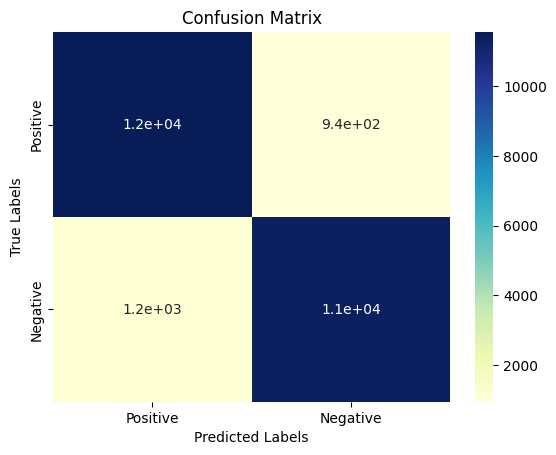

In [10]:
ax = sb.heatmap(data=naive_conf_test, cmap='YlGnBu', annot=True, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
ax.set_xlabel('Predicted Labels')
ax.set_ylabel('True Labels')
ax.set_title('Confusion Matrix')

<h3>Text Embedding</h3>
<ul>
    <li>Word2Vec</li>
    <li>GloVe</li>
    <li>FastText</li>
</ul>

In [117]:
# Make an instance from Embedding class
embedding = Embedding(X_train=X_train, X_test=X_test)

# Word2Vec
train_vecs_word2vec, test_vecs_word2vec = embedding.word2vec()

# GloVe
train_vecs_glove, test_vecs_glove = embedding.glove()

# FastText
train_vecs_fasttext, test_vecs_fasttext = embedding.fasttext()

<h3>Word Weights (Use TFIDF)</h3>

In [33]:
# Calculate Train & Test words weights
vectorizer.word_weight()

# Train data
train_words_weights = vectorizer.train_tfidf_weights

# Test data
test_words_weights = vectorizer.test_tfidf_weights

<h3>Document Embeddings</h3>
<p><b>NOTE:</b> Uses TFIDF as the transformation function to build document embeddings out of word embeddings (uses TFIDF vectors previously calculated)</p>

In [118]:
# Word2Vec
train_doc_emb_word2vec, test_doc_emb_word2vec = embedding.tfidf_weighted_document_embedding(train_vecs_word2vec, train_words_weights), embedding.tfidf_weighted_document_embedding(test_vecs_word2vec, test_words_weights)

# GloVe
train_doc_emb_glove, test_doc_emb_glove = embedding.tfidf_weighted_document_embedding(train_vecs_glove, train_words_weights), embedding.tfidf_weighted_document_embedding(test_vecs_glove, train_words_weights)

# FastText
train_doc_emb_fasttext, test_doc_emb_fasttext = embedding.tfidf_weighted_document_embedding(train_vecs_fasttext, train_words_weights), embedding.tfidf_weighted_document_embedding(test_vecs_fasttext, train_words_weights)

<h3>SVM (Classification)</h3>
<h5>Training Part</h5>

In [119]:
# Word2Vec
# Instantiate SVC
svc_word2vec = SVC(kernel='linear', C=0.1, class_weight='balanced')

# Fit model
svc_word2vec.fit(train_doc_emb_word2vec, y_train)

# GloVe
# Instantiate SVC
svc_glove = SVC(kernel='linear', C=0.1, class_weight='balanced')

# Fit model
svc_glove.fit(train_doc_emb_glove, y_train)

# FastText
# Instantiate SVC
svc_fasttext = SVC(kernel='linear', C=0.1, class_weight='balanced')

# Fit model
svc_fasttext.fit(train_doc_emb_fasttext, y_train)

SVC(C=0.1, class_weight='balanced', kernel='linear')

<h5>Evaluation Part</h5>

In [120]:
# Word2Vec
# Prediction
y_preds_word2vec = svc_word2vec.predict(test_doc_emb_word2vec)

# Evaluation metrics
acc_word2vec_svm = accuracy_score(y_test, y_preds_word2vec)
prec_word2vec_svm = precision_score(y_test, y_preds_word2vec, average='weighted')
rec_word2vec_svm = recall_score(y_test, y_preds_word2vec, average='weighted')
f1_word2vec_svm = f1_score(y_test, y_preds_word2vec, average='weighted')
conf_mat_word2vec_svm = confusion_matrix(y_test, y_preds_word2vec)

# GloVe
# Prediction
y_preds_glove = svc_glove.predict(test_doc_emb_glove)

# Evaluation metrics
acc_glove_svm = accuracy_score(y_test, y_preds_glove)
prec_glove_svm = precision_score(y_test, y_preds_glove, average='weighted')
rec_glove_svm = recall_score(y_test, y_preds_glove, average='weighted')
f1_glove_svm = f1_score(y_test, y_preds_glove, average='weighted')
conf_mat_glove_svm = confusion_matrix(y_test, y_preds_glove)


# FastText
# Prediction
y_preds_fasttext = svc_fasttext.predict(test_doc_emb_fasttext)

# Evaluation metrics
acc_fasttext_svm = accuracy_score(y_test, y_preds_fasttext)
prec_fasttext_svm = precision_score(y_test, y_preds_fasttext, average='weighted')
rec_fasttext_svm = recall_score(y_test, y_preds_fasttext, average='weighted')
f1_fasttext_svm = f1_score(y_test, y_preds_fasttext, average='weighted')
conf_mat_fasttext_svm = confusion_matrix(y_test, y_preds_fasttext)

<h5>Evaluation Metrics</h5>

In [121]:
# Make results ready
pd.DataFrame({'Accuracy': [acc_word2vec_svm, acc_glove_svm, acc_fasttext_svm], 'Precision': [prec_word2vec_svm, prec_glove_svm, prec_fasttext_svm], 'Recall': [rec_word2vec_svm, rec_glove_svm, rec_fasttext_svm], 'F1 Score': [f1_word2vec_svm, f1_glove_svm, f1_fasttext_svm]}, index=['Word2Vec', 'GloVe', 'FastText'])

,Accuracy,Precision,Recall,F1 Score
Word2Vec,0.95176,0.956005,0.95176,0.951647
GloVe,0.83284,0.874723,0.83284,0.828035
FastText,0.59552,0.776402,0.59552,0.516401


<h5>Confusion Matrices</h5>

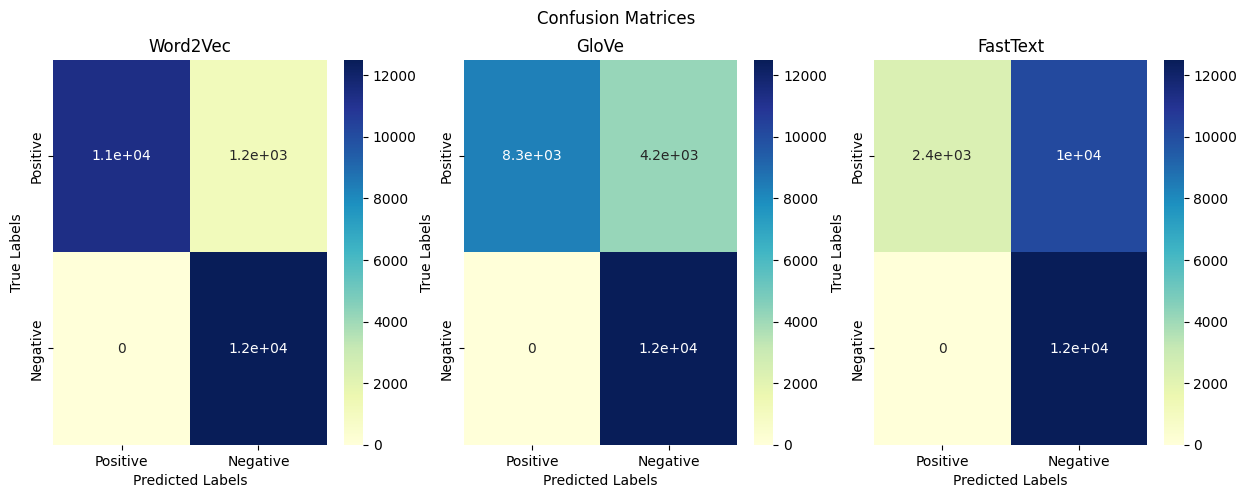

In [128]:
# Create a figure with 3 subplots in a row
fig, axs = plt.subplots(nrows=1, ncols=3, figsize=(15, 5))

# Plot each heatmap
sb.heatmap(conf_mat_word2vec_svm, ax=axs[0], cmap='YlGnBu', annot=True, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
sb.heatmap(conf_mat_glove_svm, ax=axs[1], cmap='YlGnBu', annot=True, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])
sb.heatmap(conf_mat_fasttext_svm, ax=axs[2], cmap='YlGnBu', annot=True, xticklabels=['Positive', 'Negative'], yticklabels=['Positive', 'Negative'])

# Set titles for each subplot
# Word2Vec
axs[0].set_title('Word2Vec')
axs[0].set_xlabel('Predicted Labels')
axs[0].set_ylabel('True Labels')

# GloVe
axs[1].set_title('GloVe')
axs[1].set_xlabel('Predicted Labels')
axs[1].set_ylabel('True Labels')

# FastText
axs[2].set_title('FastText')
axs[2].set_xlabel('Predicted Labels')
axs[2].set_ylabel('True Labels')

plt.suptitle('Confusion Matrices')

plt.show()

<h5>Apply LSA</h5>
<p><b>NOTE:</b> LSA uses TFIDF vectors to fit on the documents</p>

In [130]:
# Model
lsa_model = TruncatedSVD(n_components=100)

# Transform embeddings
# Train vectors
lsa_embeddings_train = lsa_model.fit_transform(X_train_vecs)

# Test vectors
lsa_embeddings_test = lsa_model.transform(X_test_vecs)

<h3>SVM Classifier</h3>
<h5>Training part</h5>

In [133]:
# Instantiate SVM Classifier
svm_lsa = SVC(C=0.1, kernel='linear', class_weight='balanced')

# Training section
svm_lsa.fit(lsa_embeddings_train, y_train)

SVC(C=0.1, class_weight='balanced', kernel='linear')

<h5>Prediction part</h5>

In [135]:
# Test data evaluation
lsa_prediction_test = svm_lsa.predict(lsa_embeddings_test)


<h5>Evaluation</h5>

In [138]:
# Evaluation metrics
# Test data
acc_svm_lsa = accuracy_score(lsa_prediction_test,  y_test)
prec_svm_lsa = precision_score(lsa_prediction_test, y_test, average='weighted')
rec_svm_lsa = recall_score(lsa_prediction_test, y_test, average='weighted')
f1_svm_lsa = f1_score(lsa_prediction_test, y_test, average='weighted')
conf_mat_svm_lsa = confusion_matrix(lsa_prediction_test, y_test)


In [139]:
pd.DataFrame({'Accuracy': [acc_svm_lsa], 'Precision': [prec_svm_lsa], 'Recall': [rec_svm_lsa], 'F1 Score': [f1_svm_lsa]}, index=['Test Results'])

,Accuracy,Precision,Recall,F1 Score
Test Results,0.84256,0.848068,0.84256,0.842995
